# 导入数据和库

In [1]:
import numpy as np
import pandas as pd
df_heart = pd.read_csv("heart.csv")
df_heart.head()    # 读取前五行

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df_heart.target.value_counts()    # 输出分类值以及各个类别数目

target
1    165
0    138
Name: count, dtype: int64

# 展示数据状况

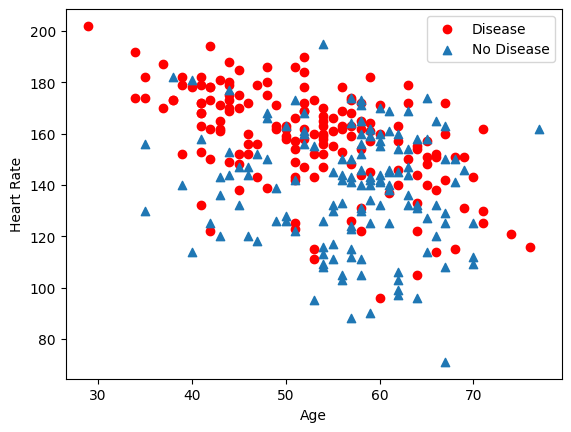

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x=df_heart.age[df_heart.target==1], y=df_heart.thalach[df_heart.target==1], c="red")
plt.scatter(x=df_heart.age[df_heart.target==0], y=df_heart.thalach[df_heart.target==0], marker="^")
plt.legend(["Disease","No Disease"])
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.show()

In [4]:
x = df_heart.drop(['target'], axis = 1)
y = df_heart.target.values    # 此时y为（303，）
y = y.reshape(len(y),1)
print("张量x的形状：", x.shape)
print("张量y的形状：", y.shape)

张量x的形状： (303, 13)
张量y的形状： (303, 1)


# 构建逻辑回归模型

## 划分数据集，并设定随机数种子为1

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)    # 此时对于训练集来说不能有测试集的特征，因此要先拟合再转换归一化
x_test = scaler.transform(x_test)

In [7]:
# 定义sigmoid函数，输入z，返回y'
def sigmoid(z):
    y_hat = 1/(1 + np.exp(-z))
    return y_hat

In [8]:
# 定义损失函数
def loss_function(x, y, w, b):
    y_hat = sigmoid(np.dot(x, w) + b)    # sigmoid逻辑函数 + 线性函数(wx+b)得到y'
    loss = -((y*np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))    # 计算损失
    cost = np.sum(loss) / x.shape[0]    # 整个数据集的平均损失
    return cost    # 返回整个数据集的平均损失

In [9]:
# 定义梯度下降的函数
def gradient_descent(x, y, w, b, lr, iteration):
    l_history = np.zeros(iteration)    # 记录梯度下降过程中中损失的数组
    w_history = np.zeros((iteration, w.shape[0], w.shape[1]))    # 记录梯度下降过程中权重的数组
    b_history = np.zeros(iteration)    # 记录梯度下降过程中偏置的数组
    for i in range(iteration):     # 进行机器训练迭代
        y_hat = sigmoid(np.dot(x, w) + b)
        derivative_w = np.dot(x.T, (y_hat-y)) / x.shape[0]    # 给权重向量求导
        derivative_b = np.sum(y_hat-y)/x.shape[0]    # 给偏置求导
        w = w - lr * derivative_w    # 更新权重向量
        b = b - lr * derivative_b    # 更新偏置
        l_history[i] = loss_function(x, y, w, b)    # 梯度下降中的损失
        # print("轮次", i+1, "当前轮训练损失：", l_history[i])
        w_history[i] = w    # 梯度下降中权重的记录
        b_history[i] = b    # 梯度下降中偏置的记录
    return l_history, w_history, b_history

In [10]:
# 定义预测函数
def predict(x, w, b):
    z = np.dot(x, w)    # 线性函数
    y_hat = sigmoid(z)    # 逻辑函数转换
    y_pred = np.zeros((y_hat.shape[0], 1))    # 初始化预测结果变量
    for i in range(y_hat.shape[0]):
        if y_hat[i, 0] < 0.5:
            y_pred[i, 0] = 0    # 如果预测概率小于0.5，输出分类0
        else:
            y_pred[i, 0] = 1    # 如果预测概率大于0.5，输出分类1
    return y_pred

In [11]:
# 定义逻辑回归模型
def logistic_regression(x, y, w, b, lr, iterations):
    l_history, w_history, b_history = gradient_descent(x, y, w, b, lr, iterations)    # 梯度下降
    print("训练最终损失：", l_history[-1])    # 输出最终损失
    y_pred = predict(x, w_history[-1], b_history[-1])    # 进行预测
    training_acc = 100 - np.mean(np.abs(y_pred - y_train)) * 100    # 计算准确率
    print("逻辑回归训练准确率：{:.2f}%".format(training_acc))
    return l_history, w_history, b_history

In [12]:
# 初始化参数
dimension = x.shape[1]    # len(x)是矩阵的行数目， 维度是列的数目
weight = np.full((dimension, 1), 0.1)    # 权重向量
bias = 0     # 偏置值
alpha = 1    # 学习速率
iterations = 1000    # 迭代次数

In [13]:
# 用逻辑回归训练机器
loss_history ,weight_history, bias_history = logistic_regression(x_train, y_train, weight ,bias, alpha, iterations)

训练最终损失： 0.31577761629463164
逻辑回归训练准确率：77.27%


In [14]:
y_pred = predict(x_test, weight_history[-1], bias_history[-1])    # 预测测试集
testing_acc = 100 - np.mean(np.abs(y_pred - y_test))*100    # 计算准确率
print("逻辑回归测试准确率：{:.2f}%".format(testing_acc))

逻辑回归测试准确率：68.85%


# 验证模型

In [15]:
%matplotlib inline    
# matplotlib魔术指令，显示内嵌图像
plt.rcParams["font.sans-serif"] = ["SimHei"] #解决中文字符乱码的问题
plt.rcParams["axes.unicode_minus"] = False #正常显示负号

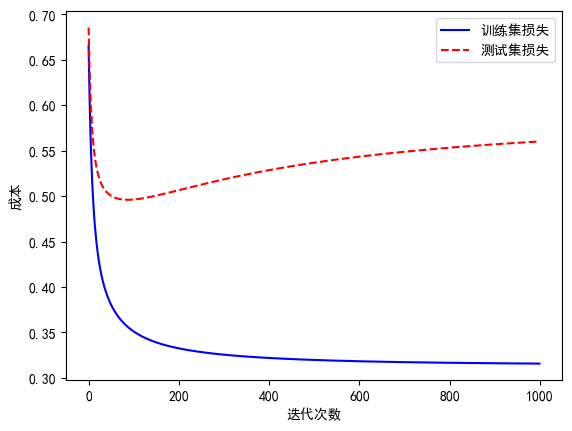

In [16]:
# 绘制损失曲线
loss_history_test = np.zeros(iterations)    # 初始化历史损失
for i in range(iterations):
    loss_history_test[i] = loss_function(x_test, y_test, weight_history[i], bias_history[i])
index = np.arange(0, iterations, 1)
plt.plot(index, loss_history, c='blue', linestyle='solid')
plt.plot(index, loss_history_test, c='red', linestyle='dashed')
plt.legend(["训练集损失", "测试集损失"])
plt.xlabel("迭代次数")
plt.ylabel("成本")
plt.show()

# 结论

在自己构建的逻辑回归模型中，不采用哑变量，最后获得的训练准确率：77.27%，测试准确率：68.85%